a) Ajustar un modelo de regresión lineal múltiple que relacione la cantidad de juegos ganados con las yardas por aire del equipo (x2 ), el porcentaje de jugadas por tierra (x7) y las yardas por tierra del contrario (x8
).

In [60]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy import stats


In [61]:
datos = pd.read_csv("Liga_nacional_de_futbol.csv")

M1 = smf.ols(formula="y ~ x2 + x7 + x8", data=datos).fit()

print(M1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     29.44
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           3.27e-08
Time:                        21:26:50   Log-Likelihood:                -52.532
No. Observations:                  28   AIC:                             113.1
Df Residuals:                      24   BIC:                             118.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8084      7.901     -0.229      0.8

b)Formar la tabla de análisis de varianza y probar la significancia de la regresión.

In [62]:
n = len(datos)
X = np.column_stack([
    np.ones(n),    
    datos["x2"].to_numpy(),
    datos["x7"].to_numpy(),
    datos["x8"].to_numpy()
                    ])                              
y = datos["y"].to_numpy()       

XtX  = X.T @ X                  
XtY  = X.T @ y
beta = np.linalg.solve(XtX, XtY)  
print("beta:", beta)              

p   = beta.shape[0] - 1          
GLT = n - 1
GLRes = int(M1.df_resid)         
GLR  = GLT - GLRes               

SCT = float(y @ y - (y.sum()**2) / n)           
SCE = float(beta.T @ XtY - (y.sum()**2) / n)    
SSE = SCT - SCE                                  

SCT_m = float(((y - y.mean())**2).sum())
SCE_m = float(((M1.fittedvalues - y.mean())**2).sum())
SSE_m = float((M1.resid**2).sum())

CMR   = SCE / GLR
CMRes = SSE / GLRes
F0    = CMR / CMRes

anova_tbl = pd.DataFrame({
    "Fuente de variación": ["Regresión", "Residuales", "Total"],
    "Suma de cuadrados":   [SCE, SSE, SCT],
    "GL":                  [GLR, GLRes, GLT],
    "CM":                  [CMR, CMRes, np.nan],
    "F0":                  [F0,  np.nan, np.nan],
})
print("\nANOVA (M1):")
print(anova_tbl)

print("\nF (statsmodels):", float(M1.fvalue), " | p-valor:", float(M1.f_pvalue))
print("R^2:", M1.rsquared, " | R^2 ajustado:", M1.rsquared_adj)


beta: [-1.80837206  0.00359807  0.19396021 -0.00481549]

ANOVA (M1):
  Fuente de variación  Suma de cuadrados  GL         CM        F0
0           Regresión         257.094282   3  85.698094  29.43687
1          Residuales          69.870004  24   2.911250       NaN
2               Total         326.964286  27        NaN       NaN

F (statsmodels): 29.436870318644605  | p-valor: 3.273458286948758e-08
R^2: 0.7863069233109538  | R^2 ajustado: 0.759595288724823


c) Calcular el estadístico t para probar las hipótesis H0:β2=0, H0:β7=0 y H0:β8=0. 
¿Qué conclusiones se pueden sacar acerca del papel de las variables x2, x7 y x8 en el modelo?

In [63]:
df_res = n - p - 1
varest = SSE / df_res
XtX_inv = np.linalg.inv(X.T @ X)
t0_vals = beta.ravel() / np.sqrt(varest * np.diag(XtX_inv))

print(t0_vals)

[-0.22888296  5.17709024  2.19826168 -3.77103645]


In [64]:
n = len(datos)
X = np.column_stack([
    np.ones(n),    
    datos["x2"].to_numpy(),
    datos["x7"].to_numpy(),
    datos["x8"].to_numpy()
                    ])                              
y = datos["y"].to_numpy()       

XtX  = X.T @ X                  
XtY  = X.T @ y
beta = np.linalg.solve(XtX, XtY)  
print("beta:", beta)              

p   = beta.shape[0] - 1          
GLT = n - 1
GLRes = int(M1.df_resid)         
GLR  = GLT - GLRes               

SCT = float(y @ y - (y.sum()**2) / n)           
SCE = float(beta.T @ XtY - (y.sum()**2) / n)    
SSE = SCT - SCE                                  

SCT_m = float(((y - y.mean())**2).sum())
SCE_m = float(((M1.fittedvalues - y.mean())**2).sum())
SSE_m = float((M1.resid**2).sum())

CMR   = SCE / GLR
CMRes = SSE / GLRes
F0    = CMR / CMRes

anova_tbl = pd.DataFrame({
    "Fuente de variación": ["Regresión", "Residuales", "Total"],
    "Suma de cuadrados":   [SCE, SSE, SCT],
    "GL":                  [GLR, GLRes, GLT],
    "CM":                  [CMR, CMRes, np.nan],
    "F0":                  [F0,  np.nan, np.nan],
})
print("\nANOVA (M1):")
print(anova_tbl)

print("\nF (statsmodels):", float(M1.fvalue), " | p-valor:", float(M1.f_pvalue))
print("R^2:", M1.rsquared, " | R^2 ajustado:", M1.rsquared_adj)


beta: [-1.80837206  0.00359807  0.19396021 -0.00481549]

ANOVA (M1):
  Fuente de variación  Suma de cuadrados  GL         CM        F0
0           Regresión         257.094282   3  85.698094  29.43687
1          Residuales          69.870004  24   2.911250       NaN
2               Total         326.964286  27        NaN       NaN

F (statsmodels): 29.436870318644605  | p-valor: 3.273458286948758e-08
R^2: 0.7863069233109538  | R^2 ajustado: 0.759595288724823


 aqui podemos ver que las variables x2, x7 y x8 son significativas ya que son mayores al t crit

d)  Calcular R2 y R2adj para este modelo.

In [65]:
# R^2
R2 = float(np.asarray(SCE)) / float(np.asarray(SCT))
print("R2:", R2)

# R^2 ajustado
R2ADJ = 1 - (1 - R2) * ((n - 1) / (n - p - 1))
print("R2 ajustado:", R2ADJ)

R2: 0.7863069233109494
R2 ajustado: 0.7595952887248181


 e)  Trazar una gráfica de probabilidad normal de los residuales. 
¿Parece haber algún problema con la hipótesis de normalidad?

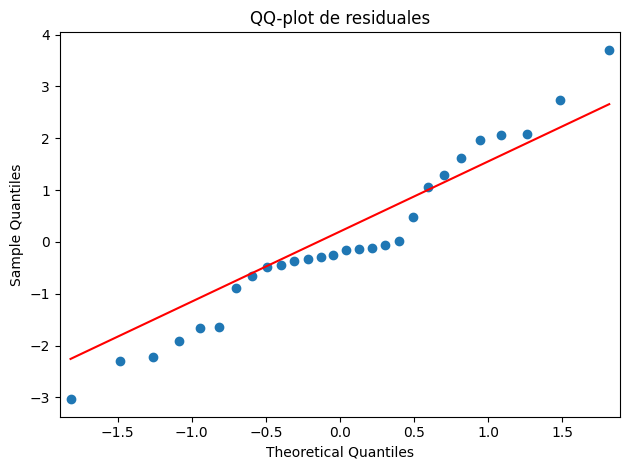

In [66]:
residuales = M1.resid

fig = qqplot(residuales, line="q")
plt.title("QQ-plot de residuales")
plt.tight_layout()
plt.show()

podemos ver que los valores se acercan a la recta por lo que aprece que puede haber normalidad

f)  Trazar e interpretar una gráfica de los residuales en función de la respuesta predicha.

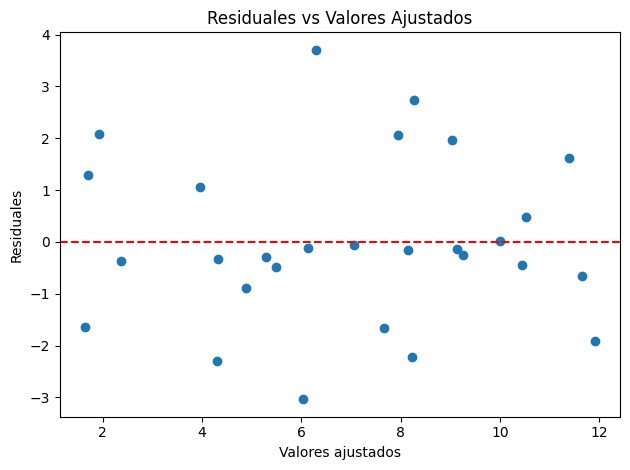

In [67]:
ajustados = M1.fittedvalues

plt.figure()
plt.scatter(ajustados, residuales)
plt.xlabel("Valores ajustados")
plt.ylabel("Residuales")
plt.title("Residuales vs Valores Ajustados")
plt.axhline(0, color="red", linestyle="--")  
plt.tight_layout()
plt.savefig("residuales_vs_ajustados.png", dpi=150)  
plt.show()

g)  Trazar las gráficas de los residuales en función de cada una de las variables regresoras. 
¿Implican esas gráficas que se especificó en forma correcta el regresor?

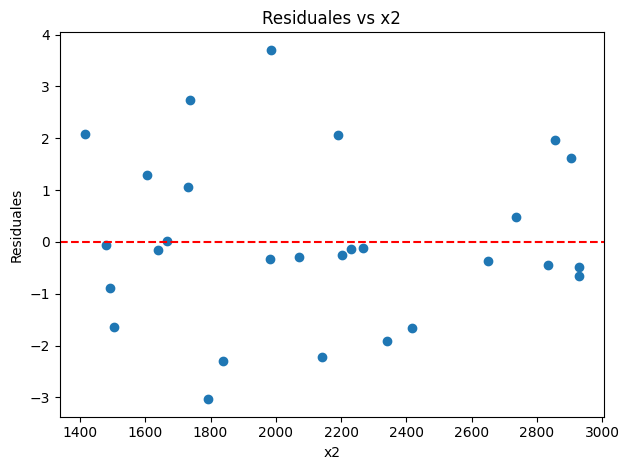

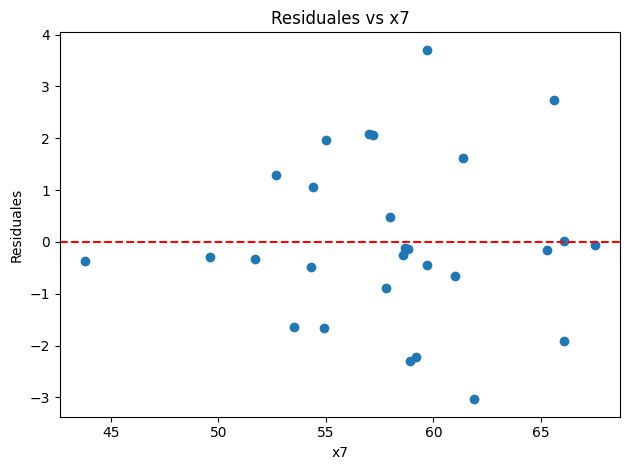

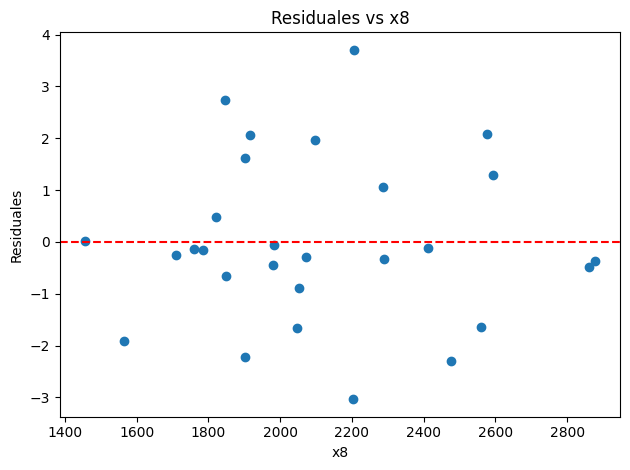

In [68]:
for col in ["x2", "x7", "x8"]:
    plt.figure()
    plt.scatter(datos[col], residuales)
    plt.xlabel(col)
    plt.ylabel("Residuales")
    plt.title(f"Residuales vs {col}")
    plt.axhline(0, color="red", linestyle="--")
    plt.tight_layout()
    plt.show()

todas las graficas son bastante aleatorias asi pues parece que las variables estan bien especificadas en el modelo

h)  Calcular un intervalo de confianza de 95% para β7

In [69]:

df = n - p - 1              
tcrit = stats.t.ppf(0.975, df)
print("tcrit:", tcrit)

j = 2  # índice de x7 en base 0

beta7_hat = float(beta.ravel()[j])         
cjj = XtX_inv[j, j]                        
se_beta7 = np.sqrt(varest * cjj)           

LI = beta7_hat - tcrit * se_beta7
LS = beta7_hat + tcrit * se_beta7
IC_beta7 = {"LI": LI, "LS": LS}

print("beta7_hat:", beta7_hat)
print("IC_beta7:", IC_beta7)

tcrit: 2.0638985616280205
beta7_hat: 0.19396020958323593
IC_beta7: {'LI': np.float64(0.011855321567678628), 'LS': np.float64(0.37606509759879325)}


 h)  un intervalo de confianza de 95% para la cantidad media de juegos ganados por un equipo cuando x2=2300, x7=56 y x8=2100.

In [70]:
XtX_inv = np.linalg.inv(XtX)      
varest  = SSE / GLRes             

x0 = np.array([1.0, 2300.0, 56.0, 2100.0])   

y0_hat = float(x0 @ beta)

se_y0 = float(np.sqrt(varest * (x0 @ XtX_inv @ x0)))

df = n - p - 1
tcrit = stats.t.ppf(0.975, df)

IC_media = {"LI": y0_hat - tcrit * se_y0,
            "LS": y0_hat + tcrit * se_y0}

print("y0_hat:", y0_hat)
print("se_y0:", se_y0)
print("IC_media:", IC_media)


y0_hat: 7.216423832995938
se_y0: 0.37803265666473906
IC_media: {'LI': np.float64(6.436202776657163), 'LS': np.float64(7.996644889334712)}


i)  Ajustar un modelo a esos datos, usando solo x7 y x8 como regresores y probar la significancia de la regresión.

In [71]:
M2 = smf.ols("y ~ x7 + x8", data=datos).fit()
print(M2.summary())

n = len(datos)
X2 = np.column_stack([
    np.ones(n),                       
    datos["x7"].to_numpy(),
    datos["x8"].to_numpy()
                    ])                                   
y = datos["y"].to_numpy()            

XtX2  = X2.T @ X2                    
XtY2  = X2.T @ y                     
beta2 = np.linalg.solve(XtX2, XtY2)  

SCT2 = float(y @ y - (y.sum()**2)/n)
SCE2 = float(beta2.T @ XtY2 - (y.sum()**2)/n)        
SSE2 = SCT2 - SCE2                                   

p2     = beta2.shape[0] - 1      
GLR2   = int(p2)
GLRes2 = int(n - p2 - 1)
GLT    = int(n - 1)

CMR2   = SCE2 / GLR2
CMRES2 = SSE2 / GLRes2
F0_2   = CMR2 / CMRES2

anova_tbl2 = pd.DataFrame({
    "Fuente de variación": ["Regresión", "Residuales", "Total"],
    "Suma de cuadrados":   [SCE2, SSE2, SCT2],
    "GL":                  [GLR2, GLRes2, GLT],
    "CM":                  [CMR2, CMRES2, np.nan],
    "F0":                  [F0_2, np.nan, np.nan],
})
print("\nANOVA (M2):")
print(anova_tbl2)

print("\nF (statsmodels):", float(M2.fvalue), " | p-valor:", float(M2.f_pvalue))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     15.13
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           4.93e-05
Time:                        21:26:50   Log-Likelihood:                -63.031
No. Observations:                  28   AIC:                             132.1
Df Residuals:                      25   BIC:                             136.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.9443      9.862      1.819      0.0

j)  Calcular R2 y R2 adj. Compararlos con los resultados del modelo anterior

In [72]:

R2_M2 = SCE2 / SCT2
R2adj_M2 = 1 - (1 - R2_M2) * ((n - 1) / (n - p2 - 1))

print("R2_M2:", R2_M2)
print("R2adj_M2:", R2adj_M2)

R2 = SCE / SCT
R2ADJ = 1 - (1 - R2) * ((n - 1) / (n - p - 1))
print("R2 (M1):", R2)
print("R2ADJ (M1):", R2ADJ)


R2_M2: 0.5476628350557932
R2adj_M2: 0.5114758618602566
R2 (M1): 0.7863069233109494
R2ADJ (M1): 0.7595952887248181


k)  También, un intervalo de confianza de 95% para la cantidad media de juegos ganados por un equipo cuando x7 =  56 y x8=2100. Comparar las longitudes de esos intervalos de confianza con las longitudes de los correspondientes al modelo anterior.

In [73]:

XtX_inv2 = np.linalg.inv(XtX2)

resid2 = y - (X2 @ beta2)            

df2 = n - p2 - 1
varest2 = SSE2 / df2

beta7_hat_M2 = beta2[1]


cjj2 = XtX_inv2[1, 1]               
se_beta7_M2 = np.sqrt(varest2 * cjj2)

tcrit2 = stats.t.ppf(0.975, df2)

IC_beta7_M2 = {
    "LI": beta7_hat_M2 - tcrit2 * se_beta7_M2,
    "LS": beta7_hat_M2 + tcrit2 * se_beta7_M2,
}

print("beta7_hat_M2:", beta7_hat_M2)
print("IC_beta7_M2:", IC_beta7_M2)


beta7_hat_M2: 0.04837086856606268
IC_beta7_M2: {'LI': np.float64(-0.19716428505820835), 'LS': np.float64(0.2939060221903337)}


l)  ¿Qué conclusiones se pueden sacar de este problema, acerca de las consecuencias de omitir un regresor importante de un modelo?

el modelo completo da una estimacion mayor al reducido como vimos desde el inicio sabiamos que era una variable significante y haberla quitado claramente a reducido su desempeño